# MNIST- handwritten digit recognition - Advanced Topics
In this modeule, we will talk about how we can further improve performance using various techniques.

## Batch Normalization
Do you remember we normalized input images such that they have zero mean? The training converges faster when images are normalized (zero mean and unit variance) and decorrelated. However, the parameter update during the training changes distributions in each layer, which is called *internal covariant shift*. Ioffe and Szegedy suggested [batch normalization](https://arxiv.org/abs/1502.03167) to normalize and decorrelate inputs to the mid-layers to resolve this issue and make the netwrok training converges faster. 

In [6]:
# Implement Batch Normalization
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
def BN_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(16, 3, 3, input_shape=(28, 28, 1), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(16, 3, 3, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(32, 3, 3, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model
# build the model
model = BN_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=20, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
9s - loss: 0.7538 - acc: 0.8396 - val_loss: 2.8911 - val_acc: 0.1145
Epoch 2/20
8s - loss: 0.2869 - acc: 0.9607 - val_loss: 0.1399 - val_acc: 0.9859
Epoch 3/20
8s - loss: 0.1850 - acc: 0.9717 - val_loss: 0.0849 - val_acc: 0.9880
Epoch 4/20
8s - loss: 0.1328 - acc: 0.9777 - val_loss: 0.0587 - val_acc: 0.9906
Epoch 5/20
8s - loss: 0.1044 - acc: 0.9808 - val_loss: 0.0442 - val_acc: 0.9919
Epoch 6/20
8s - loss: 0.0881 - acc: 0.9826 - val_loss: 0.0405 - val_acc: 0.9911
Epoch 7/20
8s - loss: 0.0754 - acc: 0.9837 - val_loss: 0.0379 - val_acc: 0.9910
Epoch 8/20
8s - loss: 0.0686 - acc: 0.9844 - val_loss: 0.0330 - val_acc: 0.9921
Epoch 9/20
8s - loss: 0.0615 - acc: 0.9859 - val_loss: 0.0250 - val_acc: 0.9937
Epoch 10/20
8s - loss: 0.0559 - acc: 0.9866 - val_loss: 0.0234 - val_acc: 0.9940
Epoch 11/20
8s - loss: 0.0521 - acc: 0.9868 - val_loss: 0.0227 - val_acc: 0.9940
Epoch 12/20
8s - loss: 0.0501 - acc: 0.9872 - val_loss: 0.0227 - val

**Controversy**: Some people say they got better result by reversing the order of Activation and BatchNorm, but in this case, reversing order gave worse result. In principle, the BatchNorm layer should come before the Activation layer.

In [8]:
# Implement Batch Normalization - after the activation 

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
def BNr_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(16, 3, 3, input_shape=(28, 28, 1), border_mode='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Convolution2D(16, 3, 3, border_mode='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Convolution2D(32, 3, 3, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.add(BatchNormalization())
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model
# build the model
model = BNr_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=20, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
9s - loss: 8.0731 - acc: 0.2075 - val_loss: 10.1180 - val_acc: 0.1028
Epoch 2/20
8s - loss: 7.1452 - acc: 0.3332 - val_loss: 5.3596 - val_acc: 0.4771
Epoch 3/20
8s - loss: 6.6917 - acc: 0.4535 - val_loss: 5.1897 - val_acc: 0.6322
Epoch 4/20
7s - loss: 6.1551 - acc: 0.4118 - val_loss: 4.5167 - val_acc: 0.5369
Epoch 5/20
8s - loss: 5.4976 - acc: 0.5046 - val_loss: 3.3844 - val_acc: 0.6889
Epoch 6/20
7s - loss: 5.6653 - acc: 0.5611 - val_loss: 5.4644 - val_acc: 0.6904
Epoch 7/20
7s - loss: 5.7607 - acc: 0.5897 - val_loss: 5.8210 - val_acc: 0.6806
Epoch 8/20
8s - loss: 6.0808 - acc: 0.5940 - val_loss: 4.6271 - val_acc: 0.6558
Epoch 9/20
8s - loss: 7.3704 - acc: 0.5107 - val_loss: 6.8315 - val_acc: 0.5223
Epoch 10/20
8s - loss: 7.6610 - acc: 0.4419 - val_loss: 8.4770 - val_acc: 0.4536
Epoch 11/20
8s - loss: 7.5410 - acc: 0.3657 - val_loss: 6.6829 - val_acc: 0.3459
Epoch 12/20
8s - loss: 6.9014 - acc: 0.3016 - val_loss: 6.7791 - va

In [18]:
# Implement Batch Normalization
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import History

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
def BN_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(16, 3, 3, input_shape=(28, 28, 1), border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(16, 3, 3, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, border_mode='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(32, 3, 3, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    # Compile model
    adam = Adam(lr=0.001)
    history = History()
    model.compile(loss= 'categorical_crossentropy' , optimizer= adam , metrics=[ 'accuracy' ], callbacks=history)
    return model
# build the model
model = BN_model()

# Fit the model
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=50, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

/home/geena/anaconda3/envs/DLK1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1917: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
7s - loss: 0.3771 - acc: 0.9605 - val_loss: 1.5870 - val_acc: 0.3883
Epoch 2/50
7s - loss: 0.1642 - acc: 0.9900 - val_loss: 0.1376 - val_acc: 0.9910
Epoch 3/50
7s - loss: 0.1020 - acc: 0.9934 - val_loss: 0.1412 - val_acc: 0.9834
Epoch 4/50
7s - loss: 0.0701 - acc: 0.9954 - val_loss: 0.0660 - val_acc: 0.9930
Epoch 5/50
6s - loss: 0.0505 - acc: 0.9970 - val_loss: 0.0674 - val_acc: 0.9921
Epoch 6/50
7s - loss: 0.0385 - acc: 0.9972 - val_loss: 0.0526 - val_acc: 0.9922
Epoch 7/50
7s - loss: 0.0304 - acc: 0.9979 - val_loss: 0.0362 - val_acc: 0.9937
Epoch 8/50
7s - loss: 0.0242 - acc: 0.9984 - val_loss: 0.0410 - val_acc: 0.9921
Epoch 9/50
7s - loss: 0.0199 - acc: 0.9986 - val_loss: 0.0471 - val_acc: 0.9897
Epoch 10/50
7s - loss: 0.0165 - acc: 0.9986 - val_loss: 0.0469 - val_acc: 0.9893
Epoch 11/50
7s - loss: 0.0138 - acc: 0.9989 - val_loss: 0.0327 - val_acc: 0.9922
Epoch 12/50
7s - loss: 0.0109 - acc: 0.9992 - val_loss: 0.0288 - val

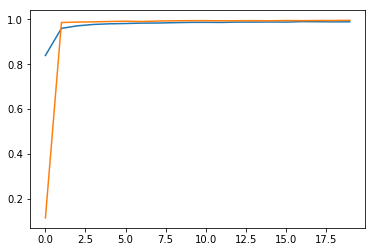

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log.history['acc']) 
plt.plot(log.history['val_acc'])
plt.show()